In [9]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.signal import butter, filtfilt
import IPython.display as ipd

def butter_filter(data, sr, cutoff, btype='low', order=5):
    nyq = 0.5 * sr
    normal_cutoff = np.array(cutoff) / nyq if isinstance(cutoff, (list, tuple)) else cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    filtered = filtfilt(b, a, data)
    return filtered


# Load audio dan potong segmen 0.5 detik mulai dari detik ke-0.5

In [10]:
file_path = "/kaggle/input/filter-sound/807486__teamenfil__202505.wav"  # ganti sesuai path file kamu
y, sr = librosa.load(file_path, sr=None)

start_time = 0.5
duration = 0.5
start_sample = int(start_time * sr)
end_sample = int(min(len(y), (start_time + duration) * sr))
segment = y[start_sample:end_sample]

print(f"Sample rate: {sr} Hz")
print(f"Segment duration: {len(segment)/sr:.3f} seconds")


Sample rate: 48000 Hz
Segment duration: 0.500 seconds


# Plot spektrum sinyal asli (segment 0.5 detik)

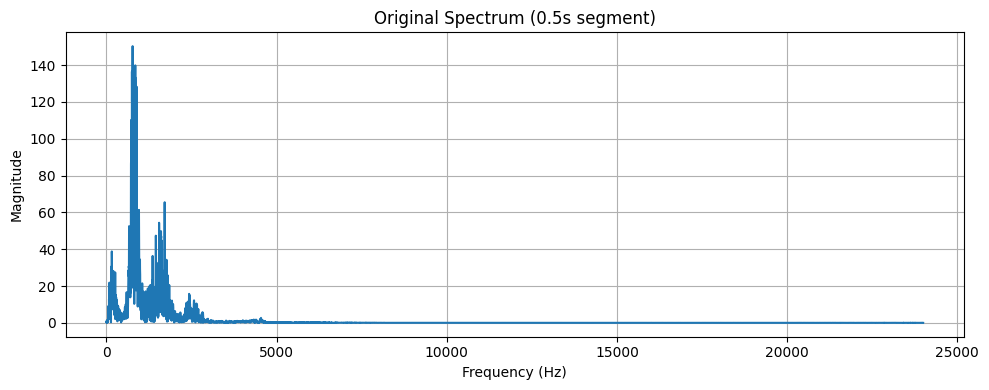

In [11]:
N = len(segment)
fft_vals = np.fft.rfft(segment)
frequencies = np.fft.rfftfreq(N, d=1/sr)
magnitude = np.abs(fft_vals)

plt.figure(figsize=(10, 4))
plt.plot(frequencies, magnitude)
plt.title("Original Spectrum (0.5s segment)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()


# Terapkan filter Butterworth: low-pass, high-pass, dan band-stop

In [12]:
low_filtered = butter_filter(segment, sr, cutoff=1000, btype='low', order=6)
high_filtered = butter_filter(segment, sr, cutoff=1000, btype='high', order=6)
bandstop_filtered = butter_filter(segment, sr, cutoff=[500, 2000], btype='bandstop', order=6)


# Plot domain waktu hasil filtering untuk perbandingan

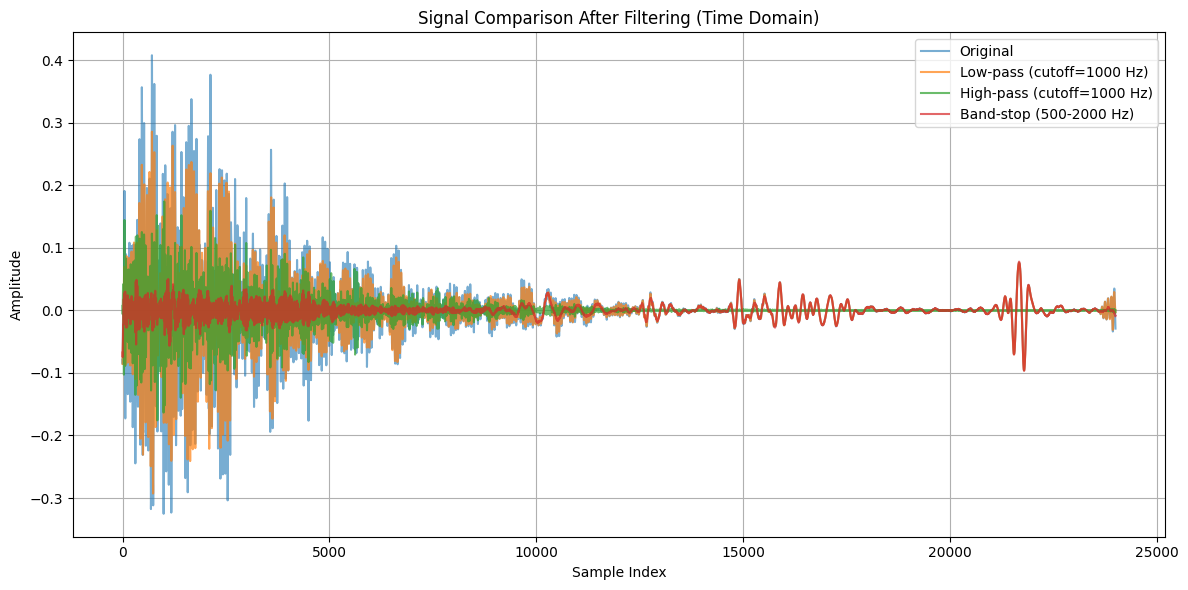

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(segment, label='Original', alpha=0.6)
plt.plot(low_filtered, label='Low-pass (cutoff=1000 Hz)', alpha=0.7)
plt.plot(high_filtered, label='High-pass (cutoff=1000 Hz)', alpha=0.7)
plt.plot(bandstop_filtered, label='Band-stop (500-2000 Hz)', alpha=0.7)
plt.title("Signal Comparison After Filtering (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Putar audio asli dan hasil filter

In [14]:
print("▶ Original Segment:")
ipd.display(ipd.Audio(segment, rate=sr))

print("▶ Low-pass Filtered (cutoff=1000 Hz):")
ipd.display(ipd.Audio(low_filtered, rate=sr))

print("▶ High-pass Filtered (cutoff=1000 Hz):")
ipd.display(ipd.Audio(high_filtered, rate=sr))

print("▶ Band-stop Filtered (500-2000 Hz):")
ipd.display(ipd.Audio(bandstop_filtered, rate=sr))


▶ Original Segment:


▶ Low-pass Filtered (cutoff=1000 Hz):


▶ High-pass Filtered (cutoff=1000 Hz):


▶ Band-stop Filtered (500-2000 Hz):
